C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


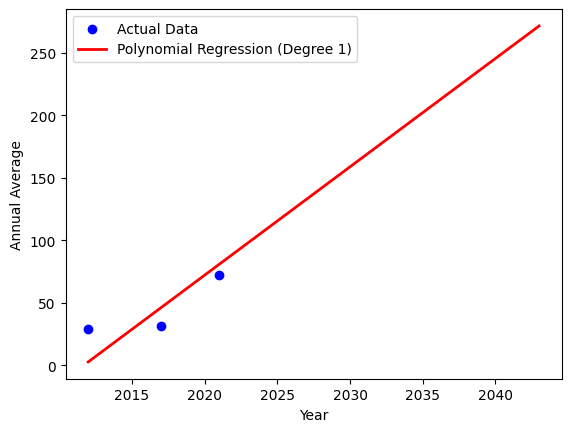

Predicted kWh price 2024: 106.80705444645719
    Year  Predicted kWh price
0   2025           115.484699
1   2026           124.162343
2   2027           132.839987
3   2028           141.517632
4   2029           150.195276
5   2030           158.872920
6   2031           167.550564
7   2032           176.228209
8   2033           184.905853
9   2034           193.583497
10  2035           202.261142
11  2036           210.938786
12  2037           219.616430
13  2038           228.294074
14  2039           236.971719
15  2040           245.649363
16  2041           254.327007
17  2042           263.004652
18  2043           271.682296
19  2044           280.359940
Mean Squared Error (MSE): 331.38743665455337
R-squared (R²): 0.15245391634577854


C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ch_ra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv("Elområde 3 Stockholm.csv")  
data.dropna(subset=["Annual Average"], inplace=True)

# Select the columns of interest
data = data[["Year/Month", "Annual Average"]]

# Split the data into features (X) and the target (y)
X = data[["Year/Month"]]
y = data["Annual Average"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 1  # You can change the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Visualize the results (optional)
x_values = np.arange(2012, 2044, 1)
x_values_poly = poly.transform(x_values.reshape(-1, 1))
y_values_poly = model.predict(x_values_poly)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(x_values, y_values_poly, color='red', linewidth=2, label=f'Polynomial Regression (Degree {degree})')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()
plt.show()

# Now, you can use the model to make predictions for any given year
year_to_predict = 2024
year_to_predict_poly = poly.transform([[year_to_predict]])
predicted_value = model.predict(year_to_predict_poly)
print(f"Predicted kWh price {year_to_predict}: {predicted_value[0]}")

# Create a list of future years for prediction
future_years = [2024 + i for i in range(1, 21)]  # Predict for the next 20 years
future_years_poly = poly.transform(np.array(future_years).reshape(-1, 1))

# Predict 'Villa utan elvärme' values for each future year
future_predictions = model.predict(future_years_poly)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Year': future_years, 'Predicted kWh price': future_predictions})

# Display the predictions
print(predictions_df)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
